# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [2]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [5]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"

# IMPORTANT: "lines" is an iterator
lines = csv.reader(open(filename, newline=''), delimiter=',')

labels = np.array(next(lines))
data = np.array(list(lines)).astype(float)

print(labels)
print(data)

['km' 'year' 'powerPS' 'avgPrice']
[[1.250000e+05 2.001000e+03 4.000000e+01 1.371110e+03]
 [1.500000e+05 2.001000e+03 4.000000e+01 1.298700e+03]
 [5.000000e+03 2.001000e+03 6.000000e+01 1.232430e+03]
 ...
 [2.000000e+04 2.015000e+03 2.600000e+02 4.949238e+04]
 [1.000000e+04 2.015000e+03 3.000000e+02 3.854269e+04]
 [2.000000e+04 2.015000e+03 3.000000e+02 3.968332e+04]]


Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




y = 1509.0938253352238 * x + -3018309.4849569635


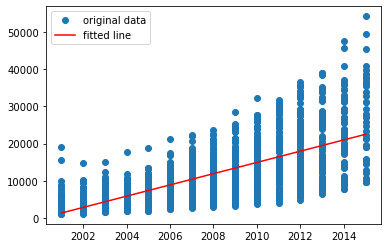

In [6]:
# linear regression with linregress (estimate price from year)

x = data[:,1]
y = data[:,3]
res = stats.linregress(x, y)
slope = res.slope
intercept = res.intercept
print("y =", slope, "* x +", intercept)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

res_year = res

y = 1509.09382533522 * x + -3018309.4849569555


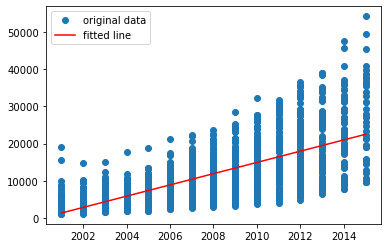

In [7]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

x = np.reshape(data[:,1],(len(data[:,1]),1))
y = data[:,3]
res = linear_model.LinearRegression().fit(x,y)
slope = res.coef_[0]
intercept = res.intercept_
print("y =", slope, "* x +", intercept)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [8]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !

# your code.....

y = 90.33080718820231 * x + -1303.912698987995


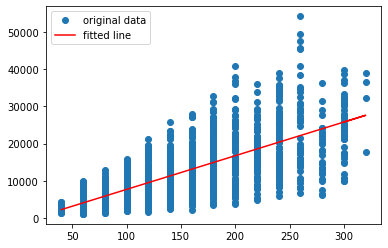

In [9]:
# linear regression with linregress (estimate price from power)

x = data[:,2]
y = data[:,3]
res = stats.linregress(x, y)
slope = res.slope
intercept = res.intercept
print("y =", slope, "* x +", intercept)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

res_power = res

y = -0.054251513309725635 * x + 16692.345302519738


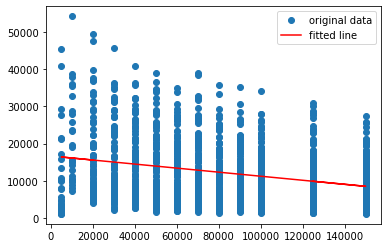

In [10]:
# linear regression with linregress (estimate price from km)

x = data[:,0]
y = data[:,3]
res = stats.linregress(x, y)
slope = res.slope
intercept = res.intercept
print("y =", slope, "* x +", intercept)

plt.plot(x, y, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

res_km = res

In [11]:
# Have a look at the correlation coefficients to see which of the 3 features works better

print("price vs year rvalue = ", res_year.rvalue)
print("price vs power rvalue = ", res_power.rvalue)
print("price vs km rvalue = ", res_km.rvalue)

price vs year rvalue =  0.6767043169095446
price vs power rvalue =  0.7085500315263968
price vs km rvalue =  -0.25728674299884974


In [12]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)

x = data[:,1:3]
y = data[:,3]
res = linear_model.LinearRegression().fit(x,y)
slope = res.coef_
intercept = res.intercept_
print("y =", slope[0], "* x[0] +", slope[1], "* x[1] +", intercept)

y = 1325.2284004046335 * x[0] + 80.43004468885394 * x[1] + -2661196.786749007
